In [1]:
import sys

from scipy.misc import imread
from scipy.linalg import norm
from scipy import sum, average

from __future__ import division

import cv2

In [24]:
iris = cv2.imread('S3001L01.jpg')

In [75]:
def crop_resize(img, height=480, width=640):
    imgH = img.shape[0]
    imgW = img.shape[1]
    ratio = height / width
    img_ratio = imgH / imgW
    
#     if img_ratio == ratio:
#         return img.copy()
    if img_ratio > ratio:
        c_img = img[0:int(ratio * imgW), 0:imgW]
    elif img_ratio < ratio:
        c_img = img[0:imgH, 0:(imgH / ratio)]
    else:
        c_img = img[0:imgH, 0:imgW]
    c_img = cv2.resize(c_img, (height, width))
    return c_img

In [25]:
big_img = cv2.imread('DSC_0604ok.jpg')

In [2]:
def simil():
    file1, file2 = sys.argv[1:1+2]
    # read images as 2D arrays (convert to grayscale for simplicity)
    img1 = to_grayscale(imread(file1).astype(float))
    img2 = to_grayscale(imread(file2).astype(float))
    # compare
    n_m, n_0 = compare_images(img1, img2)
    print "Manhattan norm:", n_m, "/ per pixel:", n_m/img1.size
    print "Zero norm:", n_0, "/ per pixel:", n_0*1.0/img1.size

In [43]:
from os import path
from glob import glob  
def find_ext(dr, ext):
    print path.join(dr,"*.{}".format(ext))
    return glob(path.join(dr,"*.{}".format(ext)))

images = find_ext("../../hq_iris_image/","jpg")

../../hq_iris_image/*.jpg


In [55]:
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [78]:
dist_list = []
for i in range(100):
    img1 = images[i]
    img2 = images[i+40]
    img1 = cv2.imread(img1)
    img2 = cv2.imread(img2)
    dists = compare_images(img1, img2)
    dist_list.append(dists[0])

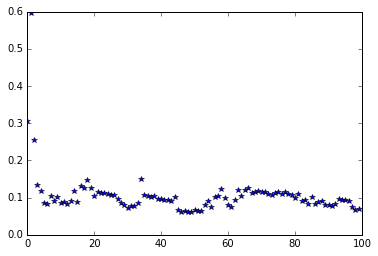

In [79]:
plt.plot(range(100), dist_list, '*')

In [54]:
print max(dist_list)

227.528753255


In [65]:
fb1 = cv2.imread('18138004_163325265000_2.jpg')
fb2 = cv2.imread('20130711120117-1161777702.jpg')
fb3 = cv2.imread('9667726_082238294187_2.jpg')

In [70]:
average([1, 2, 3])

2.0

In [77]:
fbs = [fb1, fb2, fb3]
for fb in fbs:
    dist_list = []
    for i in range(100):
        img = cv2.imread(images[5 * i])
        dist = compare_images(fb, img)
        dist_list.append(dist[0])
    print average(dist_list)

C:\Users\THINKPAD\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


0.227931183651
0.382023824689
0.518072746646


In [66]:
print compare_images(iris, fb1)
print compare_images(iris, fb2)
print compare_images(iris, fb3)

equal
small
Manhattan norm per pixel: 0.251637869082
Zero norm per pixel: 0.999957682292
(0.25163786908188251, 0.99995768229166671)
equal
small
Manhattan norm per pixel: 0.375205753494
Zero norm per pixel: 1.0
(0.37520575349440494, 1.0)
equal
large
Manhattan norm per pixel: 0.510688606886
Zero norm per pixel: 1.0
(0.51068860688593232, 1.0)


C:\Users\THINKPAD\Anaconda2\lib\site-packages\ipykernel\__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [69]:
compare_images(iris, big_img)

equal
large
Manhattan norm per pixel: 0.153302253127
Zero norm per pixel: 1.0


(0.15330225312698703, 1.0)

In [52]:
compare_images(iris, iris)

equal
equal
Manhattan norm per pixel: 0.0
Zero norm per pixel: 0.0


(0.0, 0.0)

In [31]:
img1 = cv2.cvtColor(iris,cv2.COLOR_BGR2GRAY)

In [38]:
img1 = crop_resize(img1)

equal


In [59]:
i = normalize(iris)

In [73]:
def compare_images(img1, img2, verbose=False):
    # normalize to compensate for exposure difference, this may be unnecessary
    # consider disabling it
    img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
    img1 = crop_resize(img1)
    img2 = crop_resize(img2)
    img1 = normalize(img1)
    img2 = normalize(img2)
    
    # calculate the difference and its norms
    diff = img1 - img2  # elementwise for scipy arrays
    m_norm = sum(abs(diff))  # Manhattan norm
    z_norm = norm(diff.ravel(), 0)  # Zero norm
    if verbose:
        print "Manhattan norm per pixel:", m_norm/img1.size
        print "Zero norm per pixel:", z_norm*1.0/img1.size 
    
#     print "Manhattan norm:", m_norm, "/ per pixel:", m_norm/img1.size
#     print "Zero norm:", z_norm, "/ per pixel:", z_norm*1.0/img1.size
    return (m_norm/img1.size, z_norm/img1.size )

In [27]:
def to_grayscale(arr):
    "If arr is a color image (3D array), convert it to grayscale (2D array)."
    if len(arr.shape) == 3:
        return average(arr, -1)  # average over the last axis (color channels)
    else:
        return arr

In [28]:
def normalize(arr):
    rng = arr.max()-arr.min()
    amin = arr.min()
    return (arr-amin)*255/rng